In [1]:
!pip install opencv-python
!pip install opencv-python-headless

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.17.2)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy

In [4]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import layers, Sequential
from matplotlib import pyplot
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import skimage.feature as feature
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [6]:
model1 = VGG16()
model2 = Model(inputs=model1.inputs, outputs=model1.layers[1].output)
# model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))
model = Sequential(layers=model2.layers)
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
# model = Model(inputs=model.inputs, outputs = model.layers[1].output)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [35]:
###########################THIS CODE CHECKS IMAGES FROM A FOLDER#################################

def sortTrainImages():
    # get the class labels from training datasets
    p = {}
    data_path = '../StanfordDogs/Stanford_Dogs'
    img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255, rotation_range=20)
    #labels = img_gen.flow_from_directory(data_path + '/Images')
    #train_labels = labels.class_indices.keys()

    #for lbl in train_labels:
    resnet_path = data_path +'/Images/' + 'n02113712-miniature_poodle'
    p_files = [f for f in listdir(resnet_path) if isfile(join(resnet_path, f))]
    pests_images = np.empty(len(p_files), dtype=object)
    print(p_files)
    for m in range(0, len(p_files)):
        
            #print(join(resnet_path, p_files[m]))
        imageName_x = p_files[m]
        p.update({'n02113712-miniature_poodle' + "_" + str(m): imageName_x})
            ######if m < 25:
                #pests_images[m] = cv2.imread(join(resnet_path, p_files[m]))
                # get the name of the image
                ######imageName_x = p_files[m]
                #####p.update({lbl + "_" + str(m): imageName_x})

    return p


images_collection = sortTrainImages()

['n02113712_3117.jpg', 'n02113712_3171.jpg', 'n02113712_48.jpg', 'n02113712_2632.jpg', 'n02113712_212.jpg', 'n02113712_2274.jpg', 'n02113712_2150.jpg', 'n02113712_9159.jpg', 'n02113712_3157.jpg', 'n02113712_3272.jpg', 'n02113712_335.jpg', 'n02113712_2405.jpg', 'n02113712_1897.jpg', 'n02113712_8708.jpg', 'n02113712_2136.jpg', 'n02113712_1272.jpg', 'n02113712_109.jpg', 'n02113712_743.jpg', 'n02113712_3790.jpg', 'n02113712_2699.jpg', 'n02113712_1448.jpg', 'n02113712_885.jpg', 'n02113712_628.jpg', 'n02113712_421.jpg', 'n02113712_3196.jpg', 'n02113712_3147.jpg', 'n02113712_2585.jpg', 'n02113712_1554.jpg', 'n02113712_3289.jpg', 'n02113712_3312.jpg', 'n02113712_112.jpg', 'n02113712_1558.jpg', 'n02113712_5210.jpg', 'n02113712_237.jpg', 'n02113712_459.jpg', 'n02113712_574.jpg', 'n02113712_3327.jpg', 'n02113712_2746.jpg', 'n02113712_2107.jpg', 'n02113712_9682.jpg', 'n02113712_438.jpg', 'n02113712_291.jpg', 'n02113712_9629.jpg', 'n02113712_6697.jpg', 'n02113712_7666.jpg', 'n02113712_8595.jpg', 'n

In [36]:
for j in images_collection.items():
    print(j[1])

n02113712_3117.jpg
n02113712_3171.jpg
n02113712_48.jpg
n02113712_2632.jpg
n02113712_212.jpg
n02113712_2274.jpg
n02113712_2150.jpg
n02113712_9159.jpg
n02113712_3157.jpg
n02113712_3272.jpg
n02113712_335.jpg
n02113712_2405.jpg
n02113712_1897.jpg
n02113712_8708.jpg
n02113712_2136.jpg
n02113712_1272.jpg
n02113712_109.jpg
n02113712_743.jpg
n02113712_3790.jpg
n02113712_2699.jpg
n02113712_1448.jpg
n02113712_885.jpg
n02113712_628.jpg
n02113712_421.jpg
n02113712_3196.jpg
n02113712_3147.jpg
n02113712_2585.jpg
n02113712_1554.jpg
n02113712_3289.jpg
n02113712_3312.jpg
n02113712_112.jpg
n02113712_1558.jpg
n02113712_5210.jpg
n02113712_237.jpg
n02113712_459.jpg
n02113712_574.jpg
n02113712_3327.jpg
n02113712_2746.jpg
n02113712_2107.jpg
n02113712_9682.jpg
n02113712_438.jpg
n02113712_291.jpg
n02113712_9629.jpg
n02113712_6697.jpg
n02113712_7666.jpg
n02113712_8595.jpg
n02113712_4233.jpg
n02113712_2784.jpg
n02113712_3212.jpg
n02113712_5616.jpg
n02113712_9752.jpg
n02113712_448.jpg
n02113712_2379.jpg
n02113712

In [37]:
def softMax(temperature, features_list):
    feat_list = [x / temperature for x in features_list]
    feature_list = exp(feat_list - max(feat_list))
    return feature_list / feature_list.sum(axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


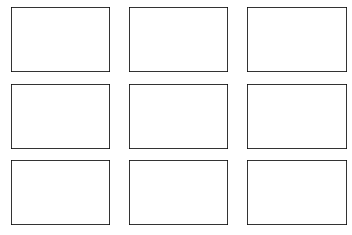

In [38]:
features_prob_dist_array = []

for j in images_collection.items():
    
    image_features_array = []
    image_string = '../StanfordDogs/Stanford_Dogs/Images/' +'n02113712-miniature_poodle/' + j[1]
  
    img = imread(image_string)
    img = resize(img,(224,224,3))
        # get the path of image to extract the class
    img_class =j[0]
    img = img_to_array(img)    
    # expand the image dimensions
    img = expand_dims(img, axis=0)
        # scale the pixels
    img = preprocess_input(img)
        # get the features of the first layer
    feature_maps = model.predict(img)
    correlation_numerator = []
    energy_numerator = []
    homogeneity_numerator = []
    dissimilarity_numerator = []
    contrast_numerator = []
   
    ix = 1
    square = 3
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ##################FLATTEN THE FEATURE for dimensionality reduction##################################
            feature_items = array(feature_maps[0, :, :, ix - 1])
            #convert the floats in the feature into unsigned integers
            features_x = feature_items.astype(np.uint8)
            #get the grey-level cooccurrence matrix
            graycom = feature.greycomatrix(features_x, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)            
            # Find the GLCM properties
            contrast = feature.greycoprops(graycom, 'contrast')
            dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
            homogeneity = feature.greycoprops(graycom, 'homogeneity')
            energy = feature.greycoprops(graycom, 'energy')
            correlation = feature.greycoprops(graycom, 'correlation')            
            ASM = feature.greycoprops(graycom, 'ASM')
            
            #get the probability distribution for this feature using correlation
            correlation_prob =softMax(0.5,correlation[0])
            contrast_prob = softMax(0.5,contrast[0])
            dissimilarity_prob = softMax(0.5,dissimilarity[0])
            homogeneity_prob = softMax(0.5,homogeneity[0])
            energy_prob = softMax(0.5,energy[0])
            
            #get the conflated distribution for this feature
            conf_numerator = np.prod(correlation_prob)
            correlation_numerator.append(conf_numerator)
            #image_features_array.append(correlation_prob)
            image_features_array.append(correlation_numerator)
            #pyplot.imshow(feature_maps[0, :, :, ix - 1], cmap='gray')
            
            ix += 1
    correlation_denominator = np.trapz(correlation_numerator,axis=0)
    #conflated distribution for the image becomes
    conflated_dist = correlation_numerator/correlation_denominator

    new_rec = {j[1] + "_/" +'n02113712-miniature_poodle': conflated_dist.tolist()}
        
    with open("../files/stanford_dogs_domain_data_correlation_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
    